<a href="https://colab.research.google.com/github/artigenius/portfolio/blob/main/C_A_texts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

In [ ]:
# Импорт для загрузки данных
nltk.download('punkt')
nltk.download('snowball_data')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package snowball_data to /root/nltk_data...


True

Контент: https://drive.google.com/file/d/1_IzZupSReQbq4oCzoibbsJOMl0mkMRpc/view?usp=sharing

In [ ]:
!gdown --id 1_IzZupSReQbq4oCzoibbsJOMl0mkMRpc

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1_IzZupSReQbq4oCzoibbsJOMl0mkMRpc
To: /content/info1.zip
100% 257k/257k [00:00<00:00, 23.4MB/s]


In [ ]:
!unzip /content/info1.zip -d /content/info

Archive:  /content/info1.zip
  inflating: /content/info/info/Сергей Попов .txt  
  inflating: /content/info/info/Лев Вожеватов.txt  
  inflating: /content/info/info/Андрей Петров.txt  
  inflating: /content/info/info/Яна Рудковская.txt  
  inflating: /content/info/info/Анастасия Шевченко.txt  
  inflating: /content/info/info/Боня.txt  
  inflating: /content/info/info/Оксана Самойлова.txt  
  inflating: /content/info/info/Настя Рыбка.txt  
  inflating: /content/info/info/Аяз Шабутдинов.txt  
  inflating: /content/info/info/Гусейн Гасанов.txt  
  inflating: /content/info/info/Алекс Лесли.docx.txt  
  inflating: /content/info/info/Гоар.txt  
  inflating: /content/info/info/Валерия Чекалина.txt  
  inflating: /content/info/info/Артем Сенаторов.txt  
  inflating: /content/info/info/Елена Блиновская.txt  
  inflating: /content/info/info/Александра Митрошина.txt  


In [ ]:
# Функция для подсчета категорий в тексте
def count_categories_in_text(text, category_dict):
    tokens = word_tokenize(text.lower())  # Получаем токены

    # Инициализация стеммера
    stemmer = SnowballStemmer("russian")

    # Лемматизация токенов
    lemmatized_tokens = [stemmer.stem(token) for token in tokens]

    # Создаем словарь для подсчета
    category_counts = {category: 0 for category in category_dict}

    # Проходимся по каждому токену и считаем вхождения категорий
    for token in lemmatized_tokens:
        for category, keywords in category_dict.items():
            for keyword in keywords:
                #if token.startswith(keyword):  # Сравниваем с лемматизированными словами словаря
                if token == keyword:
                    category_counts[category] += 1

    return category_counts



# Функция для чтения файла с несколькими текстами

def process_multiple_texts(file_path, separator, category_dict):
    with open(file_path, 'r', encoding='utf-8') as file:
        texts = file.read().split(separator)

    data = []
    # Обработка каждого текста
    for index, text in enumerate(texts, start=1):
        category_counts = count_categories_in_text(text, category_dict)
        data.append(category_counts)

    df = pd.DataFrame(data, index=range(1, len(texts)+1))  # Создаем DataFrame
    return df

# Функция для обработки всех файлов
'''
def process_multiple_files(folder_path, category_dict):
    data = []
    filenames = os.listdir(folder_path)  # Получаем список файлов в папке

    # Обработка каждого файла
    for filename in filenames:
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r', encoding='cp1251') as file:
            text = file.read()
            category_counts = count_categories_in_text(text, category_dict)
            data.append(category_counts)

    df = pd.DataFrame(data, index=[filename.split('.')[0] for filename in filenames])  # Создаем DataFrame
    return df
'''


"\ndef process_multiple_files(folder_path, category_dict):\n    data = []\n    filenames = os.listdir(folder_path)  # Получаем список файлов в папке\n\n    # Обработка каждого файла\n    for filename in filenames:\n        file_path = os.path.join(folder_path, filename)\n        with open(file_path, 'r', encoding='cp1251') as file:\n            text = file.read()\n            category_counts = count_categories_in_text(text, category_dict)\n            data.append(category_counts)\n\n    df = pd.DataFrame(data, index=[filename.split('.')[0] for filename in filenames])  # Создаем DataFrame\n    return df\n"

Словарь: https://drive.google.com/file/d/10uB7P0v-XbOIbqBm5atHx3emb_w1JyRJ/view?usp=sharing

In [ ]:
!gdown --id 10uB7P0v-XbOIbqBm5atHx3emb_w1JyRJ

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=10uB7P0v-XbOIbqBm5atHx3emb_w1JyRJ
To: /content/moral_lexicon.txt
100% 6.61k/6.61k [00:00<00:00, 10.1MB/s]


In [ ]:
# Загрузка словаря
# Чтение файла со словарем категорий
categories_file = '/content/moral_lexicon.txt'

# Создание словаря категорий
category_dict = {}
with open(categories_file, 'r', encoding='utf-8') as file:
    lines = file.readlines()
    for line in lines:
        parts = line.strip().split(':')  # Разбиваем строку по двоеточию
        category_number = parts[0].strip()
        category_keywords = parts[1].strip().split(',')  # Разбиваем ключевые слова по запятой
        category_dict[category_number] = category_keywords

# Выводим словарь категорий
for category, keywords in category_dict.items():
    print(f"{category}: {keywords}")


category_01: ['безопасн', 'мирн', 'гуман', 'человечн', 'сочувств', 'сопережива', 'сострада', 'забот', 'попечени', 'защи', 'спаса', 'спасите', 'спаст', 'спасл', 'спасал', 'приют', 'дружб', 'друг', 'друга', 'другу', 'друз', 'помощ', 'помог', 'опек', 'оберег', 'предостере']
category_02: ['вред', 'страда', 'войн', 'воев', 'воен', 'воин', 'непримирим', 'борьб', 'насил', 'избиени', 'избит', 'избив', 'побои', 'изнасилова', 'издева', 'пытк', 'пыток', 'пытать', 'пытал', 'пытали', 'пытают', 'травл', 'травить', 'травят', 'глумит', 'глумлен', 'обид', 'обиж', 'уби', 'опасн', 'жесток', 'брутальн', 'ожесточен', 'живодер', 'бессердечн', 'негуманн', 'бесчеловечн', 'оскорбл', 'оскорбит', 'навред', 'повред', 'повреж', 'разруш', 'уничтож', 'губи', 'сгуби', 'загуби', 'испорт', 'ущерб', 'отказ', 'подави', 'атак', 'напад', 'истреб', 'отверг', 'поврежд', 'рани', 'ранен']
category_03: ['справед', 'равен', 'равны', 'правосуд', 'беспристрастн', 'порядочн', 'равноправ', 'заслужен', 'оправд', 'взаимн', 'непредубеж

In [ ]:
folder_path = "/content/info/info"

result_df = process_multiple_files(folder_path, category_dict)
print(result_df)

UnicodeDecodeError: 'charmap' codec can't decode byte 0x98 in position 1298: character maps to <undefined>

In [ ]:
result_df

,category_01,category_02,category_03,category_04,category_05,category_06,category_07,category_08,category_09,category_10,category_11
Лимонов,81,59,7,37,39,12,86,2,7,5,9
Каспаров,93,16,9,7,32,15,161,12,3,0,9
Путин,148,66,29,40,50,10,90,2,11,2,8
Немцов,50,44,31,19,27,18,92,4,3,4,11
Зюганов,80,49,12,36,62,14,135,11,5,2,14


In [ ]:
columns_new = {
    'category_01': 'Забота',
    'category_02': 'Вред',
    'category_03': 'Справедливость',
    'category_04': 'Несправедливость',
    'category_05': 'Лояльность',
    'category_06': 'Нелояльность',
    'category_07': 'Уважение',
    'category_08': 'Неуважение',
    'category_09': 'Чистота',
    'category_10': 'Порочность',
    'category_11': 'Мораль'
}

# Переименовываем столбцы и сохраняем изменения в исходном DataFrame
result_df.rename(columns=columns_new, inplace=True)

In [ ]:
polit_moral = result_df.T

In [ ]:
polit_moral

,Лимонов,Каспаров,Путин,Немцов,Зюганов
Забота,81,93,148,50,80
Вред,59,16,66,44,49
Справедливость,7,9,29,31,12
Несправедливость,37,7,40,19,36
Лояльность,39,32,50,27,62
Нелояльность,12,15,10,18,14
Уважение,86,161,90,92,135
Неуважение,2,12,2,4,11
Чистота,7,3,11,3,5
Порочность,5,0,2,4,2


In [ ]:
polit_moral.to_csv('polit_moral.csv', sep=',')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Politician')

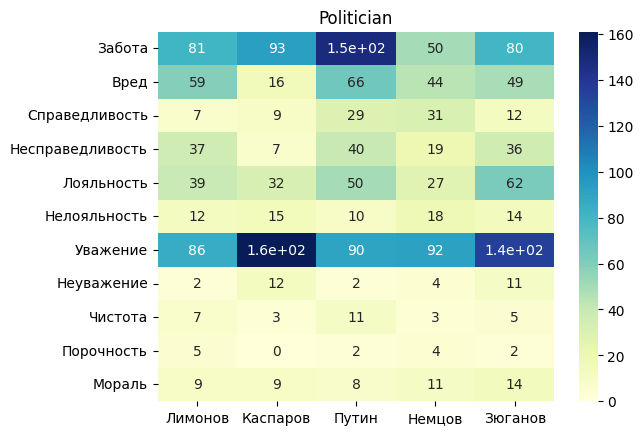

In [ ]:
sns.heatmap(polit_moral, annot=True, cmap='YlGnBu')
plt.title("Politician")

In [ ]:
pip install phik

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 5.8 MB/s eta 0:00:00


In [ ]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [ ]:
polit_moral_phik = polit_moral.phik_matrix()
polit_moral_phik = polit_moral_phik.round(3)

interval columns not set, guessing: ['Лимонов', 'Каспаров', 'Путин', 'Немцов', 'Зюганов']


In [ ]:
import numpy as np
import seaborn as sns

In [ ]:
polit_moral_phik


,Лимонов,Каспаров,Путин,Немцов,Зюганов
Лимонов,1.000,0.497,0.804,0.854,0.834
Каспаров,0.497,1.000,1.000,1.000,1.000
Путин,0.804,1.000,1.000,0.995,1.000
Немцов,0.854,1.000,0.995,1.000,0.932
Зюганов,0.834,1.000,1.000,0.932,1.000


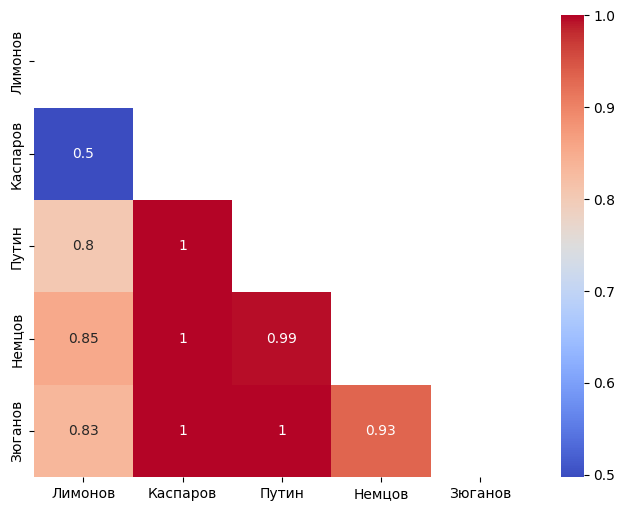

In [ ]:
mask = np.triu(np.ones_like(polit_moral_phik, dtype=bool))
plt.figure(figsize=(8, 6))
sns.heatmap(polit_moral_phik, annot=True, cmap='coolwarm', mask=mask)
plt.show()

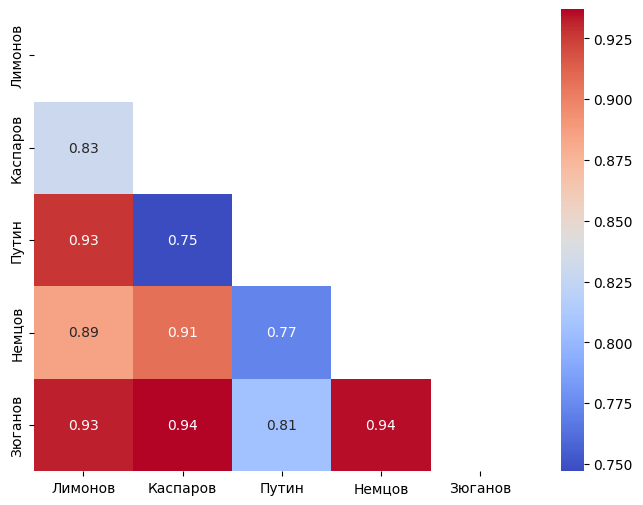

In [ ]:
polit_moral_pirson = polit_moral.corr().round(3)
mask = np.triu(np.ones_like(polit_moral_pirson, dtype=bool))
plt.figure(figsize=(8, 6))
sns.heatmap(polit_moral_pirson, annot=True, cmap='coolwarm', mask=mask)
plt.show()


In [ ]:
polit_moral_pirson

,Лимонов,Каспаров,Путин,Немцов,Зюганов
Лимонов,1.000,0.830,0.927,0.885,0.932
Каспаров,0.830,1.000,0.747,0.907,0.937
Путин,0.927,0.747,1.000,0.772,0.806
Немцов,0.885,0.907,0.772,1.000,0.935
Зюганов,0.932,0.937,0.806,0.935,1.000


In [ ]:
result_df

,Забота,Вред,Справедливость,Несправедливость,Лояльность,Нелояльность,Уважение,Неуважение,Чистота,Порочность,Мораль
Лимонов,81,59,7,37,39,12,86,2,7,5,9
Каспаров,93,16,9,7,32,15,161,12,3,0,9
Путин,148,66,29,40,50,10,90,2,11,2,8
Немцов,50,44,31,19,27,18,92,4,3,4,11
Зюганов,80,49,12,36,62,14,135,11,5,2,14


In [ ]:
result_df_phik = result_df.phik_matrix()
result_df_phik = result_df_phik.round(3)

interval columns not set, guessing: ['Забота', 'Вред', 'Справедливость', 'Несправедливость', 'Лояльность', 'Нелояльность', 'Уважение', 'Неуважение', 'Чистота', 'Порочность', 'Мораль']


In [ ]:
result_df_phik

,Забота,Вред,Справедливость,Несправедливость,Лояльность,Нелояльность,Уважение,Неуважение,Чистота,Порочность,Мораль
Забота,1.000,1.0,0.261,0.913,1.0,1.0,0.416,0.598,0.771,0.913,0.913
Вред,1.000,1.0,1.000,1.000,1.0,1.0,1.000,1.000,1.000,1.000,1.000
Справедливость,0.261,1.0,1.000,0.598,1.0,1.0,0.926,0.000,0.598,0.261,1.000
Несправедливость,0.913,1.0,0.598,1.000,1.0,1.0,1.000,1.000,0.771,0.913,0.913
Лояльность,1.000,1.0,1.000,1.000,1.0,1.0,1.000,1.000,1.000,1.000,1.000
Нелояльность,1.000,1.0,1.000,1.000,1.0,1.0,1.000,1.000,1.000,1.000,1.000
Уважение,0.416,1.0,0.926,1.000,1.0,1.0,1.000,0.751,0.416,0.416,0.416
Неуважение,0.598,1.0,0.000,1.000,1.0,1.0,0.751,1.000,0.261,0.598,0.598
Чистота,0.771,1.0,0.598,0.771,1.0,1.0,0.416,0.261,1.000,0.771,0.913
Порочность,0.913,1.0,0.261,0.913,1.0,1.0,0.416,0.598,0.771,1.000,0.771


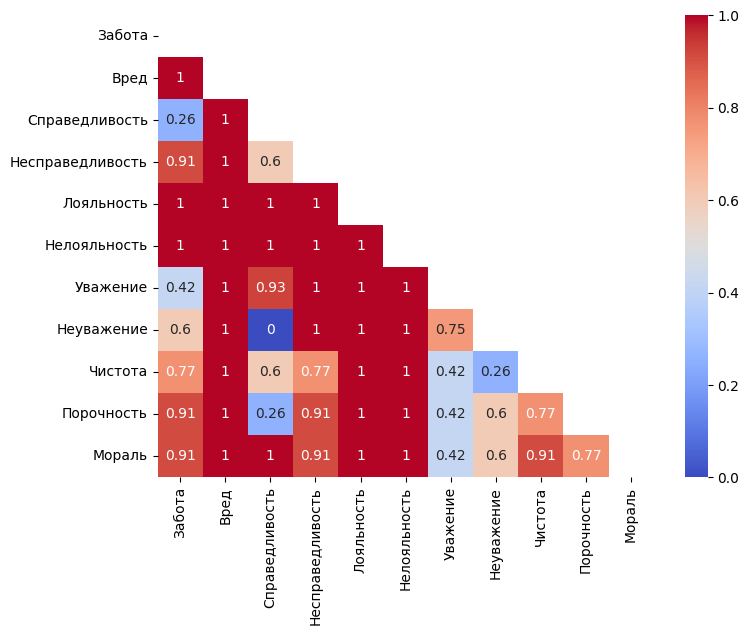

In [ ]:
mask = np.triu(np.ones_like(result_df_phik, dtype=bool))
plt.figure(figsize=(8, 6))
sns.heatmap(result_df_phik, annot=True, cmap='coolwarm', mask=mask)
plt.show()